In [2]:
import pandas as pd
import plotnine as p9
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

## Variable Descriptions
https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track (are we sure we are getting the right data variables. popularity can be for artist, album, track ....

**id**: (string) The Spotify ID for the track.

**title**: (string) The name of the song for the track. 

**all_artists**: (string) The name of the artists for the song.

**popularity**: (int) Popularity is measured on a scale from 0-100 of how popular the song is. "[P]opularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past"

**release_date**: (string) The date on which the track was released for listening on Spotify, represented in yyyy-mm-dd format.

**danceability**: (float) Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**: (float) Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**key**: (int) The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. >= -1, <= 11

**loudness**: (float) The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**: (int) Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**acousticness**: (float) A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. >= 0 <= 1

**instrumentalness**: (float) Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**liveness**: (float) Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**valence**: (float) A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). >= 0 <= 1

**tempo**: (float) The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**duration_ms**: (int) The duration of the track in milliseconds.

**time_signature**: (int) An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". >= 3 <= 7


In [3]:
top2019 = pd.read_csv("Popular_Playlist_2019.csv")
top2019=top2019.set_index("id")
top2020 = pd.read_csv("Popular_Playlist_2020.csv")
top2020=top2020.set_index("id")
top2021 = pd.read_csv("Popular_Playlist_2021.csv")
top2021=top2021.set_index("id")

In [4]:
topSongs = pd.concat([top2019,top2020,top2021]).drop_duplicates()

In [5]:
topSongs = topSongs.reset_index()

In [6]:
# Reformatting Dates
topSongs.release_date = pd.to_datetime(topSongs.release_date)
#scaling popularity 
topSongs["popularity_scaled"] = topSongs["popularity"]/100

In [7]:
quant01 = ['danceability', 'energy', 
    'acousticness', 'liveness',
       'valence',"popularity_scaled"]
colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9','#bae1ff',"#D5D6EA"]
facetdfTopSongs = pd.melt(topSongs, id_vars=['id'], value_vars=quant01)

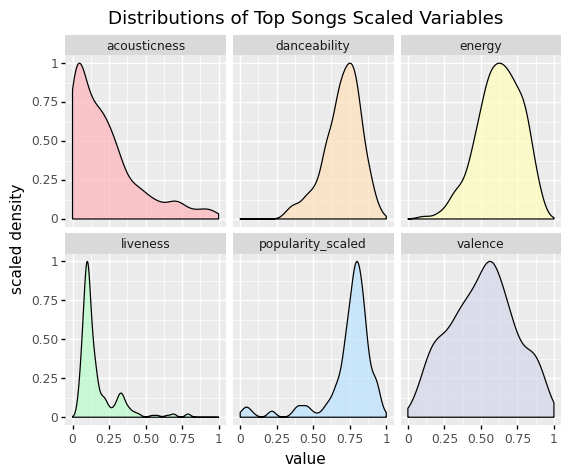

<ggplot: (-9223371898800649852)>

In [8]:
# Plot: Distributions of Scaled Variables Top Songs
gg = p9.ggplot(facetdfTopSongs, p9.aes(x='value', y = after_stat("scaled"), fill = 'factor(variable)'))
gg += p9.geom_density(alpha = 0.7,show_legend=False)
gg += p9.facet_wrap('~variable') 
gg += p9.scale_fill_manual(values = colors)
gg += p9.ggtitle("Distributions of Top Songs Scaled Variables")
gg += p9.labels.ylab("scaled density")
gg

In [14]:
#load in data
data = pd.read_csv("TikTok_Playlist.csv")
data

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,5reQI13tWWYDLMrGcUF4Mk,Nuestra Canción,"['Monsieur Periné', 'Vicente Garcia']",83,2015-06-16,0.906,0.731,6,-7.021,0,0.42600,0.000005,0.0853,0.794,106.995,260080,4
1,6M47gaKejso9772SKTa3yH,Face Off,"['Tech N9ne', 'Joey Cool', 'King Iso', 'Dwayne...",81,2021-10-08,0.693,0.935,8,-4.323,1,0.18000,0.000000,0.1790,0.391,80.882,219802,4
2,4IhTXiZLKATmwhMZIb1GQN,Lights Are On,['Tom Rosenthal'],78,2018-10-26,0.440,0.040,3,-16.887,1,0.98100,0.465000,0.1110,0.249,135.965,193749,4
3,15HMh4yxdf4wyxSZSlOgGZ,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,"['Amaarae', 'Kali Uchis', 'Moliy']",88,2021-09-16,0.859,0.525,1,-8.051,0,0.43400,0.000023,0.1080,0.312,110.066,204764,4
4,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,['Adele'],100,2021-10-14,0.604,0.366,5,-7.519,1,0.57800,0.000000,0.1330,0.130,141.981,224695,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0ecC8p17cDNlxHXkuYqeR6,Surrender,['Natalie Taylor'],76,2019-10-29,0.390,0.448,5,-8.570,0,0.80000,0.182000,0.1070,0.077,144.890,183103,5
201,6otiaV2fagE3s8IvP6WkwG,I'm Just a Kid,['Simple Plan'],73,2018-04-06,0.527,0.834,1,-5.531,1,0.00107,0.000102,0.0993,0.422,110.065,198333,4
202,6vFsBXYczYsP0H3lgunZOm,Cloud 9,['Beach Bunny'],80,2020-02-14,0.637,0.929,4,-3.593,1,0.00167,0.000026,0.3440,0.902,80.974,147351,4
203,11ZulcYY4lowvcQm4oe3VJ,Slumber Party (feat. Princess Nokia),"['Ashnikko', 'Princess Nokia']",79,2021-01-15,0.964,0.398,11,-8.981,0,0.00151,0.000039,0.1010,0.563,105.012,178405,4


In [15]:
# Reformatting Dates
data.release_date = pd.to_datetime(data.release_date)

In [16]:
#scaling popularity 
data["popularity_scaled"] = data["popularity"]/100

In [17]:
#view overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 205 non-null    object        
 1   title              205 non-null    object        
 2   all_artists        205 non-null    object        
 3   popularity         205 non-null    int64         
 4   release_date       205 non-null    datetime64[ns]
 5   danceability       205 non-null    float64       
 6   energy             205 non-null    float64       
 7   key                205 non-null    int64         
 8   loudness           205 non-null    float64       
 9   mode               205 non-null    int64         
 10  acousticness       205 non-null    float64       
 11  instrumentalness   205 non-null    float64       
 12  liveness           205 non-null    float64       
 13  valence            205 non-null    float64       
 14  tempo     

In [18]:
quant01 = ['danceability', 'energy', 
    'acousticness', 'liveness',
       'valence',"popularity_scaled"]
colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9','#bae1ff',"#D5D6EA"]
facetdf01 = pd.melt(data, id_vars=['id'], value_vars=quant01)
facetdf01

,id,variable,value
0,5reQI13tWWYDLMrGcUF4Mk,danceability,0.906
1,6M47gaKejso9772SKTa3yH,danceability,0.693
2,4IhTXiZLKATmwhMZIb1GQN,danceability,0.440
3,15HMh4yxdf4wyxSZSlOgGZ,danceability,0.859
4,0gplL1WMoJ6iYaPgMCL0gX,danceability,0.604
...,...,...,...
1225,0ecC8p17cDNlxHXkuYqeR6,popularity_scaled,0.760
1226,6otiaV2fagE3s8IvP6WkwG,popularity_scaled,0.730
1227,6vFsBXYczYsP0H3lgunZOm,popularity_scaled,0.800
1228,11ZulcYY4lowvcQm4oe3VJ,popularity_scaled,0.790


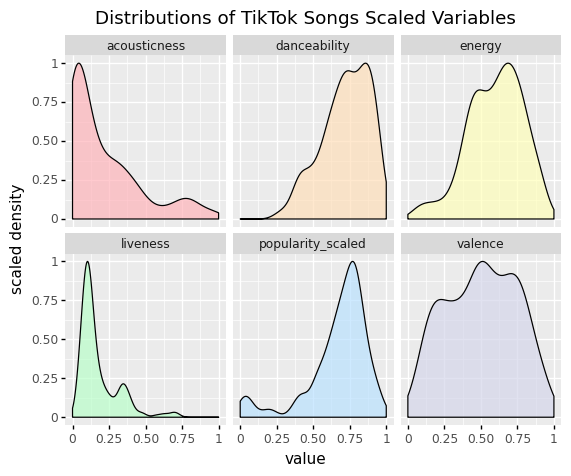

In [51]:
# Plot 1: Distributions of Scaled Variables
gg = p9.ggplot(facetdf01, p9.aes(x='value', y = after_stat("scaled"), fill = 'factor(variable)'))
gg += p9.geom_density(alpha = 0.7,show_legend=False)
gg += p9.facet_wrap('~variable') 
gg += p9.scale_fill_manual(values = colors)
gg += p9.ggtitle("Distributions of TikTok Songs Scaled Variables")
gg += p9.labels.ylab("scaled density")
#plot and remove address printing
gg.draw();

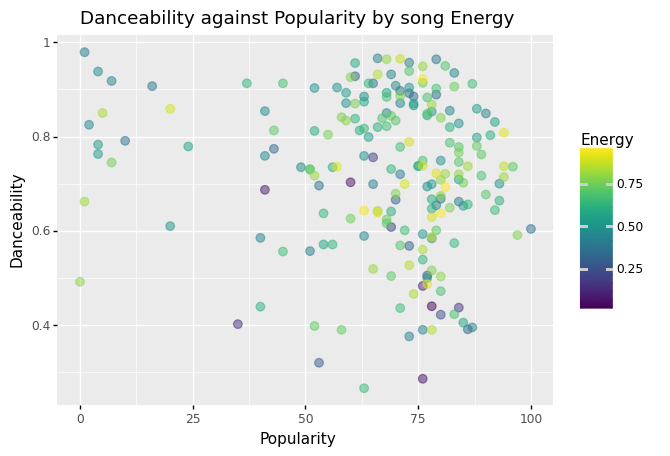

In [57]:
# Plot 2: Danceability against Popularity by song Energy
'''
Plot danceability against popularity by color energy,
we can see that high energy tracks are both danceable and more popular. 
Generally high popularity of songs indicates high value of danceability on Tiktok
'''
plot2 = p9.ggplot(data, p9.aes(x='popularity', y = "danceability", color = "energy") )
plot2 += p9.geom_count(alpha = 0.5, size = 3)
plot2 += p9.ggtitle('Danceability against Popularity by song Energy')
plot2 += p9.labels.ylab("Danceability")
plot2 += p9.labels.xlab("Popularity")
plot2 += p9.labs(color='Energy') 
plot2.draw();

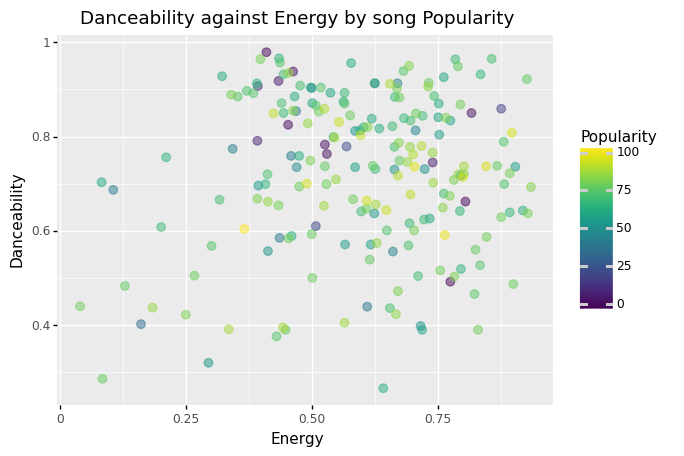

In [58]:
# Plot 3: Danceability against Popularity by song Energy
'''
Plot danceability against energy by color popularity,
There is no clear correlation between the variables.
'''
plot3 = p9.ggplot(data, p9.aes(x='energy', y = "danceability", color = "popularity") )
plot3 += p9.geom_count(alpha = 0.5, size = 3)
plot3 += p9.ggtitle('Danceability against Energy by song Popularity')
plot3 += p9.labels.ylab("Danceability")
plot3 += p9.labels.xlab("Energy")
plot3 += p9.labs(color='Popularity') 
plot3.draw();

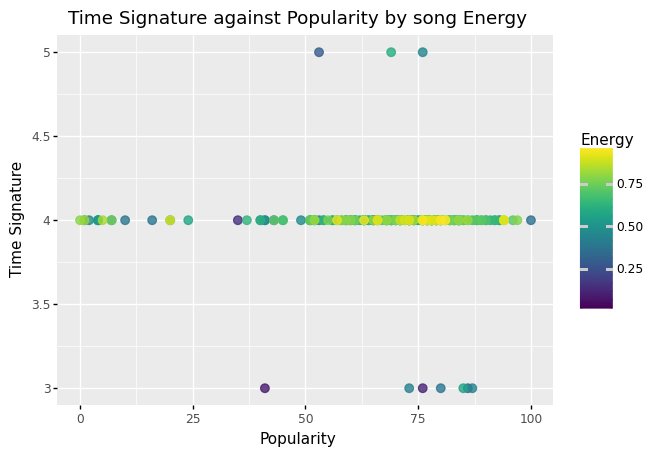

In [59]:
# Plot 4: Time signature against Popularity by song Energy
'''
Plot time signature against popularity by color energy,
we can see that high energy tracks are likely to have 4 beats in each bar and more popular,
and low energy tracks are only popular when they have 3 beats per bar or 5 beats per bar.
Generally high popularity of songs indicates 4 beats per bar with high energy on Tiktok.
'''
plot4 = p9.ggplot(data, p9.aes(x='popularity', y = "time_signature", color = "energy") )
plot4 += p9.geom_count(alpha = 0.8, size=3)
plot4 += p9.ggtitle('Time Signature against Popularity by song Energy')
plot4 += p9.labels.ylab("Time Signature")
plot4 += p9.labels.xlab("Popularity")
plot4 += p9.labs(color='Energy') 
plot4.draw();

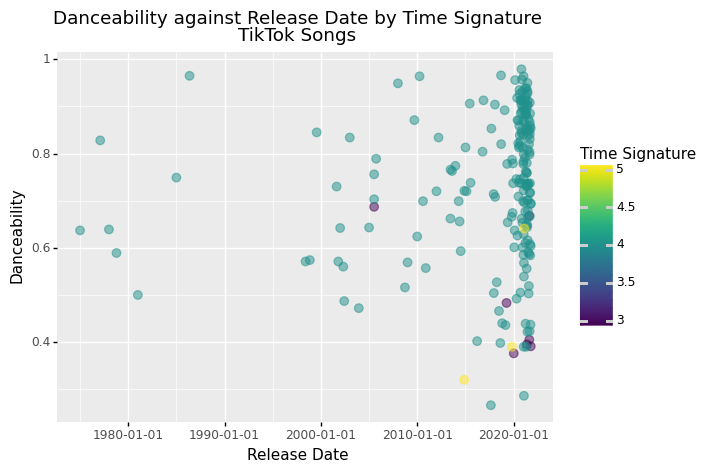

In [60]:
# Plot 5: Danceability against Release date by color Time Signature for TikTok Songs
'''
Plot danceability against release date by color time signature,
we can clearly see that most TikTok songs are very new, released within one year of being popular on TikTok. 
The danceability value is across the spectrum for recent TikTok songs, but older songs are overall in the
higher range of danceability, which is likely why users picked out the song in the first place. 
Again it is visible that most data points is 4 beats per bar, but less danceable songs have 3/5 beats per bar
and that they are recent, so the novelty is likely valued more for those songs by TikTok users than time signature.
'''
plot5 = p9.ggplot(data, p9.aes(x='release_date', y = "danceability", color = "time_signature") )
plot5 += p9.geom_count(alpha = 0.5, size = 3)
plot5 += p9.ggtitle('Danceability against Release Date by Time Signature\nTikTok Songs')
plot5 += p9.labels.ylab("Danceability")
plot5 += p9.labels.xlab("Release Date")
plot5 += p9.labs(color='Time Signature') 
plot5.draw();

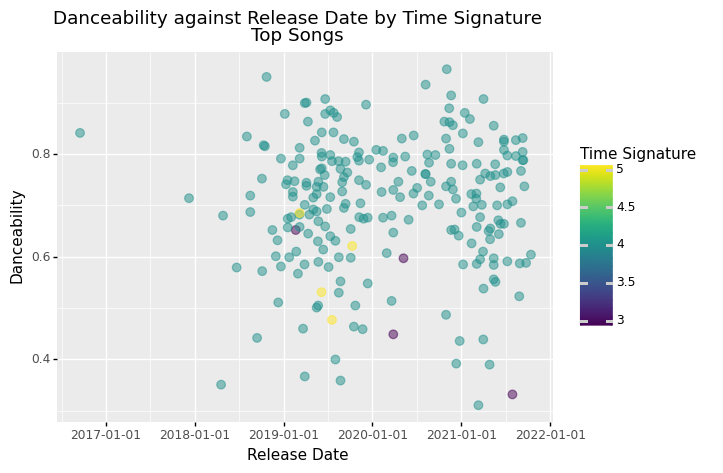

In [61]:
# Plot 6: Danceability against Release date by color Time Signature for Top Songs
'''
Plot danceability against release date by color time signature for top songs,
these playlists are for the three years 2019, 2020, 2021. Most songs are released within a year of their 
inclusion on the list of top songs for the year, but there are notable outliers such as the song released in 2016.
The danceability value is on the higher end of the scale for most of the top songs, between 0.6 and 0.8.

Again it is visible that most data points is 4 beats per bar, but less danceable songs have 3/5 beats per bar.
'''
plot6 = p9.ggplot(topSongs, p9.aes(x='release_date', y = "danceability", color = "time_signature") )
plot6 += p9.geom_count(alpha = 0.5, size = 3)
plot6 += p9.ggtitle('Danceability against Release Date by Time Signature\nTop Songs')
plot6 += p9.labels.ylab("Danceability")
plot6 += p9.labels.xlab("Release Date")
plot6 += p9.labs(color='Time Signature') 
plot6.draw();

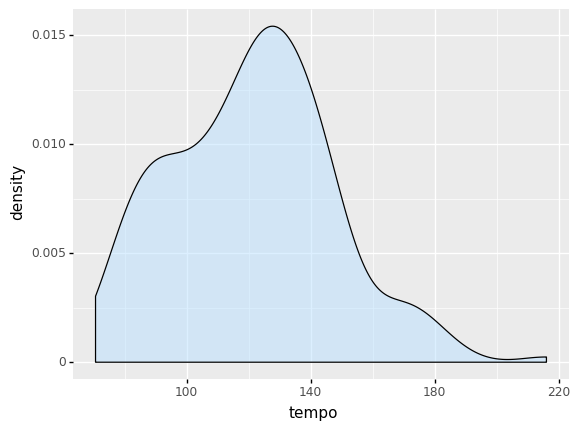

In [42]:
gg = p9.ggplot(data, p9.aes(x='tempo'))
gg += p9.geom_density(fill = "#bae1ff", alpha = 0.5)
#plot and remove address printing
gg.draw();

In [44]:
import seaborn as sns
import matplotlib

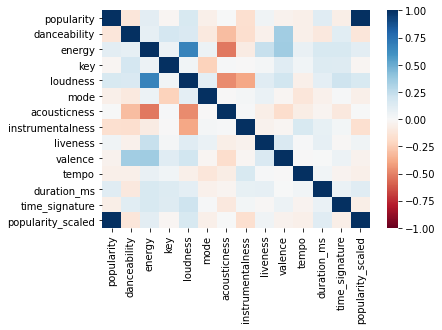

In [50]:
ryb = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","red"])
corr = data.corr()
corr.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)
_ = sns.heatmap(data.corr(), vmin = -1, vmax = 1, cmap = 'RdBu')

In [45]:
data.corr()['popularity']

popularity           1.000000
danceability        -0.121491
energy               0.108312
key                 -0.017194
loudness             0.159674
mode                -0.055381
acousticness         0.002463
instrumentalness    -0.163533
liveness             0.041305
valence             -0.041070
tempo               -0.058760
duration_ms          0.117908
time_signature      -0.065551
popularity_scaled    1.000000
Name: popularity, dtype: float64

In [49]:
(abs(data.corr()['popularity']).sort_values()

acousticness         0.002463
key                  0.017194
valence              0.041070
liveness             0.041305
mode                 0.055381
tempo                0.058760
time_signature       0.065551
energy               0.108312
duration_ms          0.117908
danceability         0.121491
loudness             0.159674
instrumentalness     0.163533
popularity_scaled    1.000000
popularity           1.000000
Name: popularity, dtype: float64